In [9]:
# Goal: Generate 100 realizations of the lightcurve and dump into files for Sheng to run his bolometric code on
import sys, os
import numpy as np
import logging
import warnings
import tqdm
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')

import matplotlib.pyplot as plt
import seaborn
import astropy.table as table

import snelib19odp.dataset as dataset
import snelib19odp.utils as utils

In [2]:
# load dataset
ds19odp = dataset.load_dataset('SN2019odp_phot')

In [23]:
tgt_dir = '2022-02-09-lc-export'
if not os.path.isdir(tgt_dir):
    os.mkdir(tgt_dir)

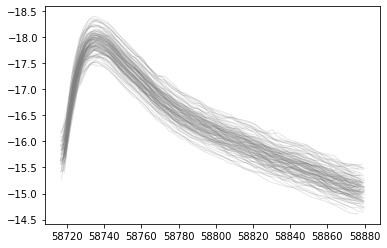

In [24]:
num_datapoints = 70
num_lcs = 100

min_t = 58716.38
max_t = 58880
bolometric_method='lyman'

for i in range(num_lcs):
    destfile = os.path.join(tgt_dir, '%02d.txt' % i)
    t_grid = np.sort(np.random.uniform(min_t, max_t, num_datapoints))
    lc = ds19odp.sample_abs_lc(method=bolometric_method, t_grid=t_grid)
    lums = utils.convert_luminosity(lc)
    t = table.Table({'mjd': t_grid, 'qbol_mag': lc, 'luminosity': lums})
    t.write(destfile, format='ascii.commented_header', overwrite=True)
    
    
    plt.plot(t_grid, lc, color='grey', alpha=0.2, lw=1)
plt.gca().invert_yaxis()